# Bike sharing system

UCL machine learning repository dataset. Let's find out how the weather and the season can affect bike rental. 

### FEATURES:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from 
http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: (MISSING) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
 
This dataset could have info about the duration of travel, departure and arrival position. These features could turn bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Let's rename count for "total" 
df.rename(columns={'cnt':'total'}, inplace=True)

In [5]:
#It shows that people rent more bikes during the summer and spring. 
b = df.groupby(['season'])['total'].sum()

b

season
1     471348
2     918589
3    1061129
4     841613
Name: total, dtype: int64

In [3]:
#Just rechecking that season 3 is summer

df_season2 = df.groupby(['season'])['temp'].sum()

df_season2

NameError: name 'df' is not defined

In [7]:
#Let's check that casual + registered = total 

df['compare'] = df['casual'] + df['registered'] - df['total']

df['compare'].isnull().sum()

0

In [8]:
#Only the dteday is an object 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
total         731 non-null int64
compare       731 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


In [9]:
#The means between the temperature and the feeling temperature are almost the same. 
#These variables are very similar.

df.groupby(['season'])['temp'].describe()
#df.groupby(['season'])['atemp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,181.0,0.297748,0.102735,0.059130,0.222500,0.285833,0.361739,0.572500
2,184.0,0.544405,0.122650,0.253043,0.458125,0.562083,0.631667,0.808333
3,188.0,0.706309,0.070848,0.469167,0.667083,0.714583,0.750208,0.861667
4,178.0,0.422906,0.107834,0.220833,0.331250,0.409166,0.513542,0.657500


We can see in the histograms that the counts shift to the right approaching summer time.

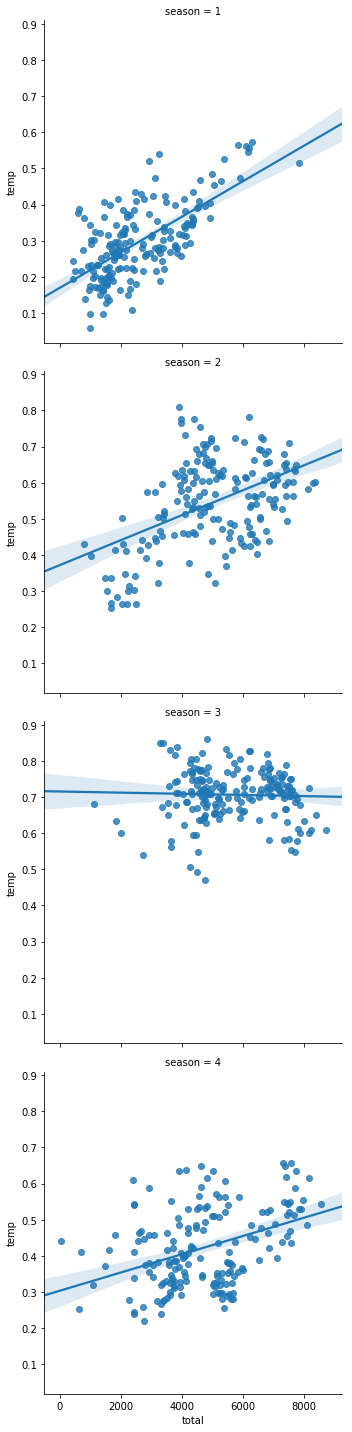

In [10]:
# simple histogram: df['windspeed'].plot.hist()

# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="total",
           y="temp",
           row="season")

# Show the plot
plt.show()

In [141]:
#Creating seasonal datasets 
winter = df[df['season']== 1]
spring = df[df['season']== 2]
summer = df[df['season']== 3]
autumn = df[df['season']== 4]

## Simple stats 

- From the results we can see that people rent more bikes when the temperature is higher, except during the summer, in which case the slope of the curve is negative and the null hypothesis is true (temperature does not influence renting), giving a p-value of 0.65.  

Reflection taken from Georgios Karakostas: 

- Linear models rely upon a lot of assumptions (such as the features being independent). If those assumptions are violated, p-values and R-squared are less reliable. 
- Adding features to your model that are unrelated to the response will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are proxies for our goal of generalization, whereas train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data.

In [12]:
#simple stats before doing the model
# Check how to do a for loop for every season and present them in a table

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(autumn['total'],
                                                               autumn['temp'])
print(slope, intercept, r_value, p_value, std_err)


2.5230256161942004e-05 0.3036132776448287 0.39766559208393576 3.8735244787311315e-08 4.38801177012931e-06


### RESULTS:

Slope, intercept, r_value, p_value, std_err

winter 4.910952949166206e-05 0.1698598226141662 0.6692021886042464 7.275203549819776e-25 4.0758452979262774e-06

spring 3.448739106243276e-05 0.3722326681051683 0.4768841896363573 7.729352417449099e-12 4.711767660709053e-06

summer -1.5927712916880893e-06 0.7152993925956259 -0.03281875789906809 0.654797460820099 3.556647284763486e-06

autumn 2.5230256161942004e-05 0.3036132776448287 0.39766559208393576 3.8735244787311315e-08 4.38801177012931e-06

In [13]:
#Another method, using numpy polyfit:
slope, intercept = np.polyfit(winter['total'], winter['temp'], 1)
print(slope, intercept)

4.9109529491661996e-05 0.16985982261416627


 ## Correlation matrixes
 
This helps us identify relevant relations between variables. 

Our target variable is 'total', the amount of bikes rented, with the types 'casual' and 'registered'. 

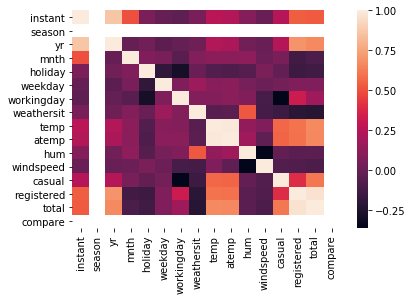

In [14]:
# correlation matrix (ranges from 1 to -1)
winter.corr()

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(winter.corr())

## Feature engineering : Seeking simplicity.

- 'Weekday', 'holiday' are already contained in 'workingday', therefore we can drop them. 

- In general, 'season' already has information about the temperature and the date. 

- We can perform time series but because it is only two dates (2011-2012), we don't have enough statistical data to make predictions.

- Hypothesis: 'weathersit' summarizes information contained in other weather variables: 'hum', 'windspeed'; therefore we can use it and drop the others.

- We drop 'instant' because it is an identity variable.

In [15]:
df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total', 'compare'], dtype=object)

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,compare
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [25]:
# drop example: df.drop(['B', 'C'], axis=1)

data = df.drop(['instant', 'dteday', 'mnth', 'holiday', 
                'weekday','atemp'], axis=1)


In [26]:
#Creating seasonal datasets 
winter = data[data['season']== 1]
spring = data[data['season']== 2]
summer = data[data['season']== 3]
autumn = data[data['season']== 4]

In [2]:
#This correlation matrix is better. 

cor_mat = winter[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

NameError: name 'winter' is not defined

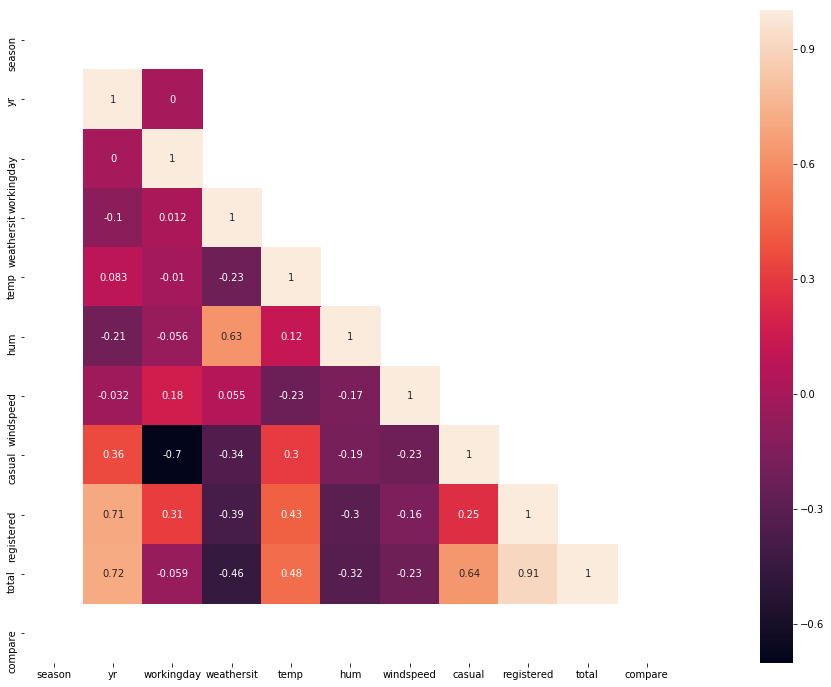

In [28]:
cor_mat = spring[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

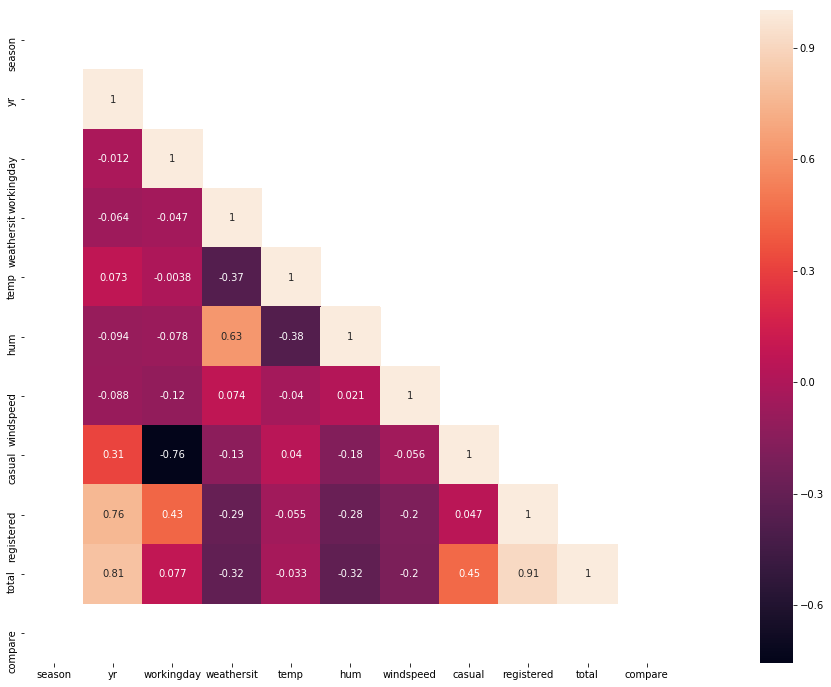

In [29]:
cor_mat = summer[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

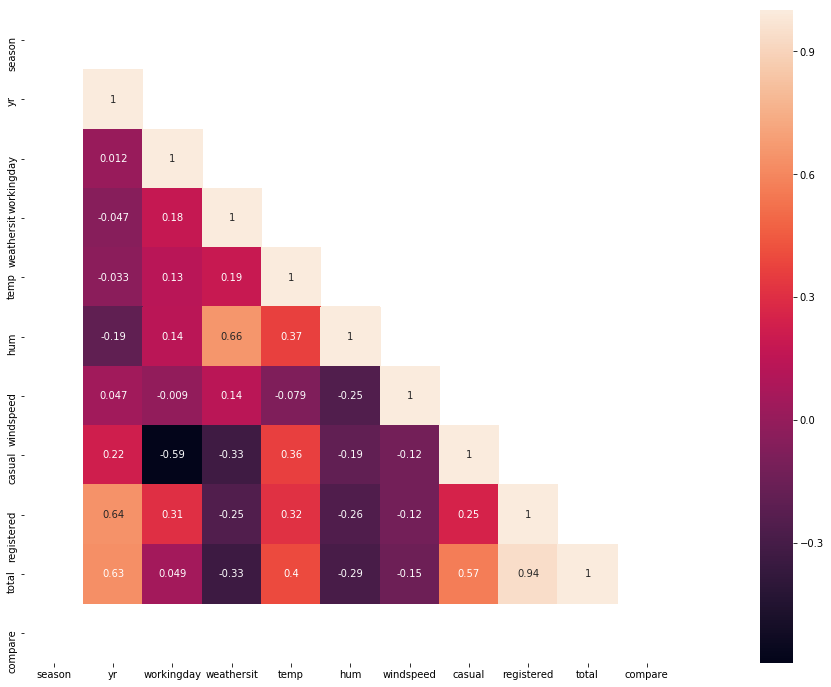

In [30]:
cor_mat = autumn[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

Additional graphs presented below could demonstrate conclusions better.

# Conclusions 

-  During working days and sunny days there are more bike rented, for all values. 

- There are almost no bikes rented on a bad weather day. 

- Summer is the only season when a cloudy day influences less bike rental.

- The total of bike rental increased for all values the next year.

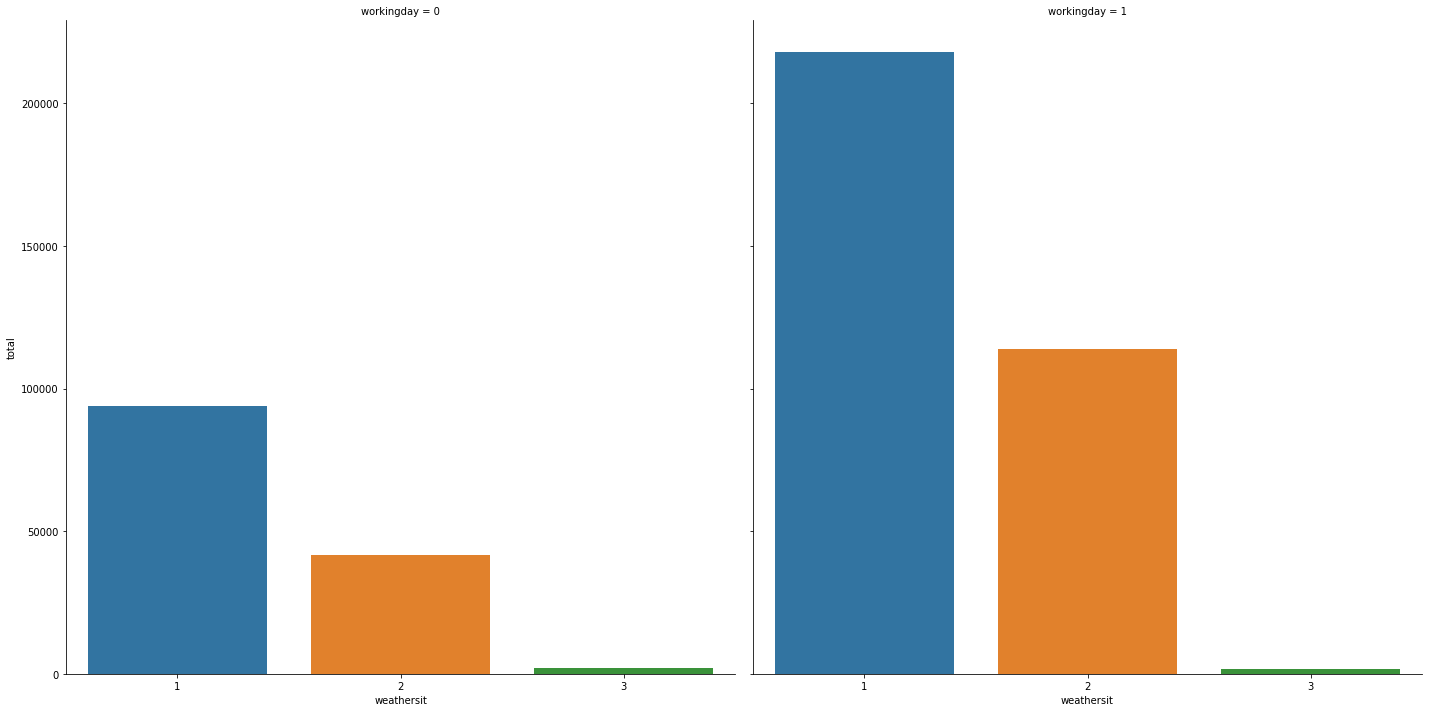

In [34]:
#Weather analysis together with workingday

g=sns.factorplot(x='weathersit',y='total',data=winter,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=10,aspect=1)

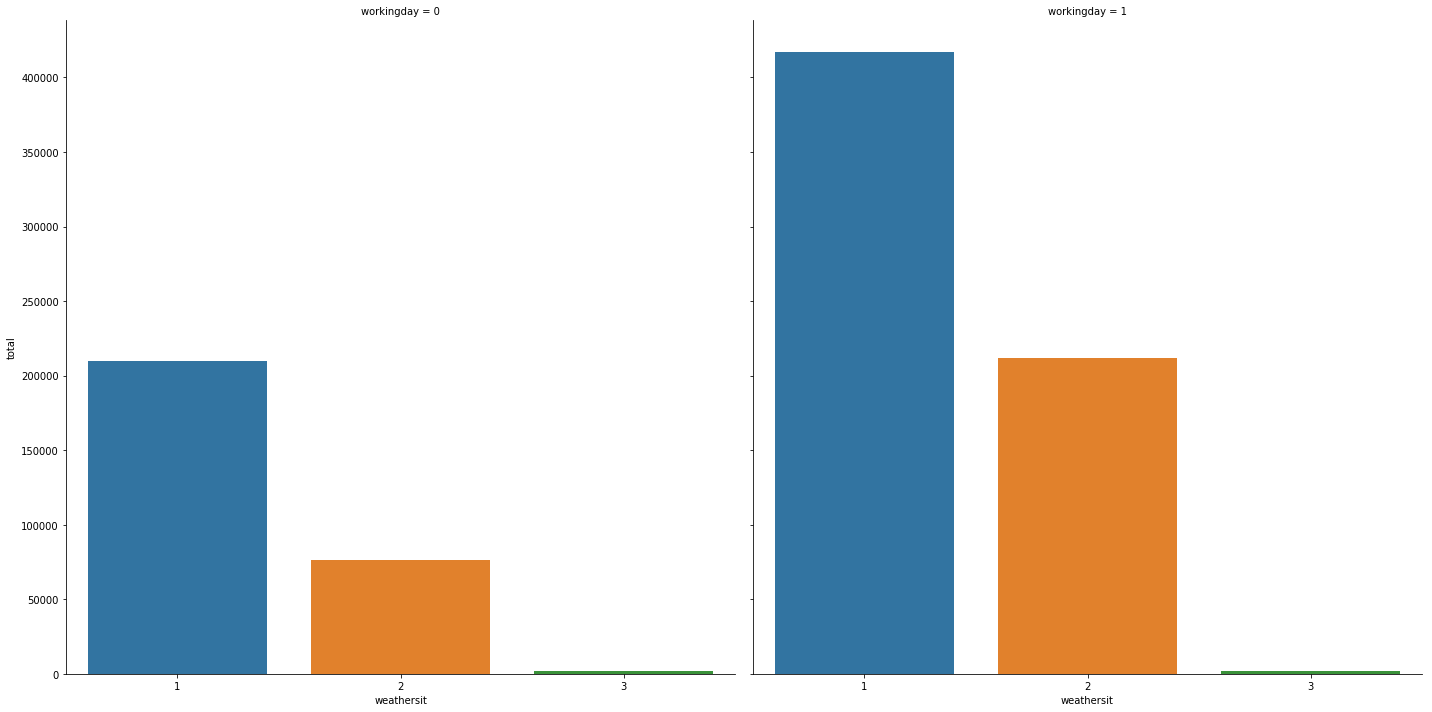

In [35]:
#Weather analysis together with workingday

g=sns.factorplot(x='weathersit',y='total',data=spring,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=10,aspect=1)

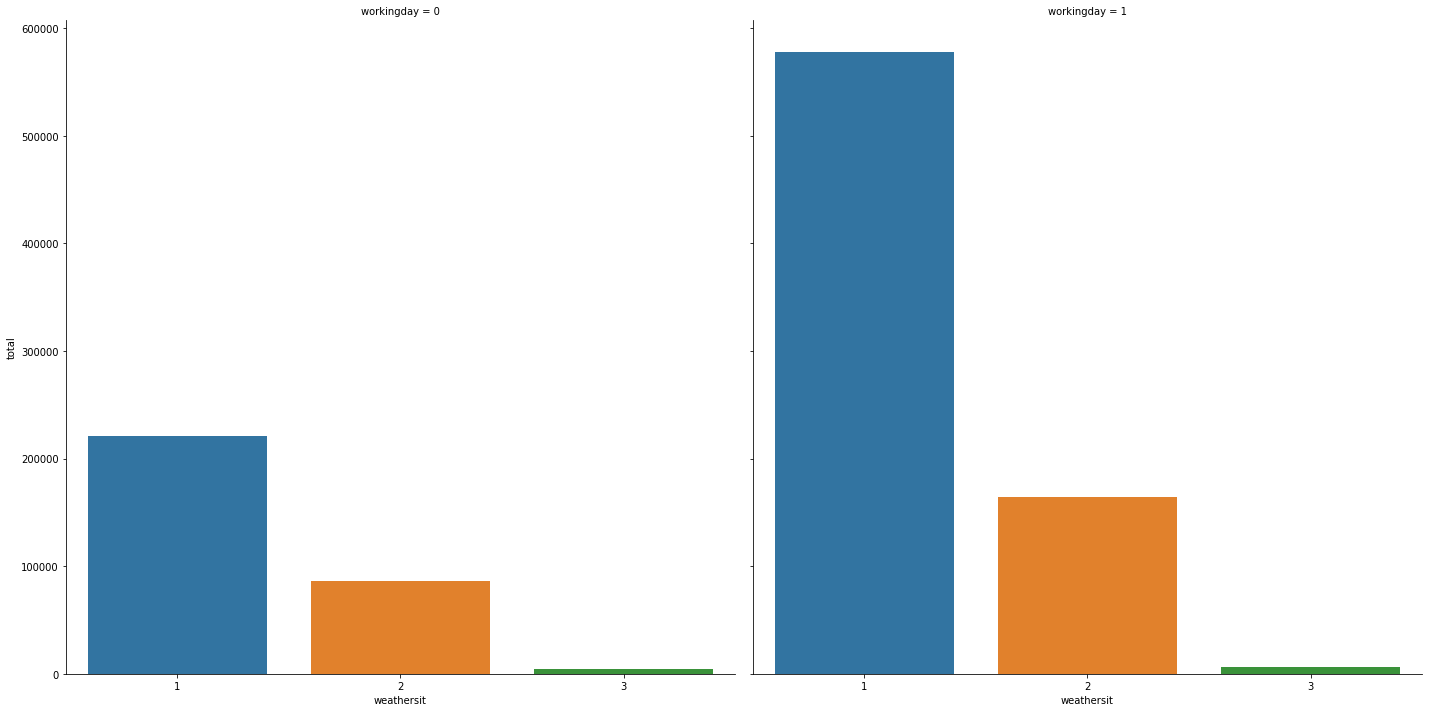

In [33]:
#Weather analysis together with workingday. 

g=sns.factorplot(x='weathersit',y='total',data=summer,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=10,aspect=1)

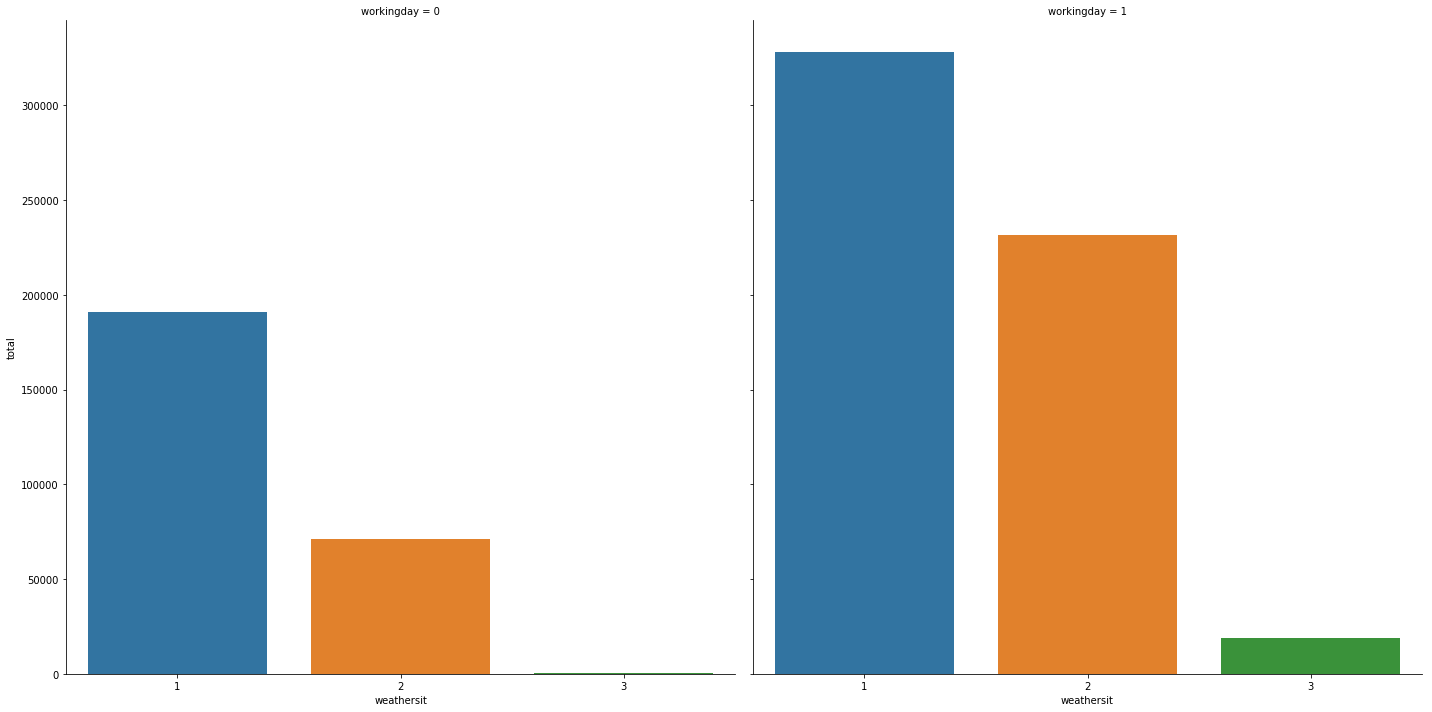

In [53]:
#Weather analysis together with workingday

g=sns.factorplot(x='weathersit',y='total',data=autumn,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=10,aspect=1)

### Year influence

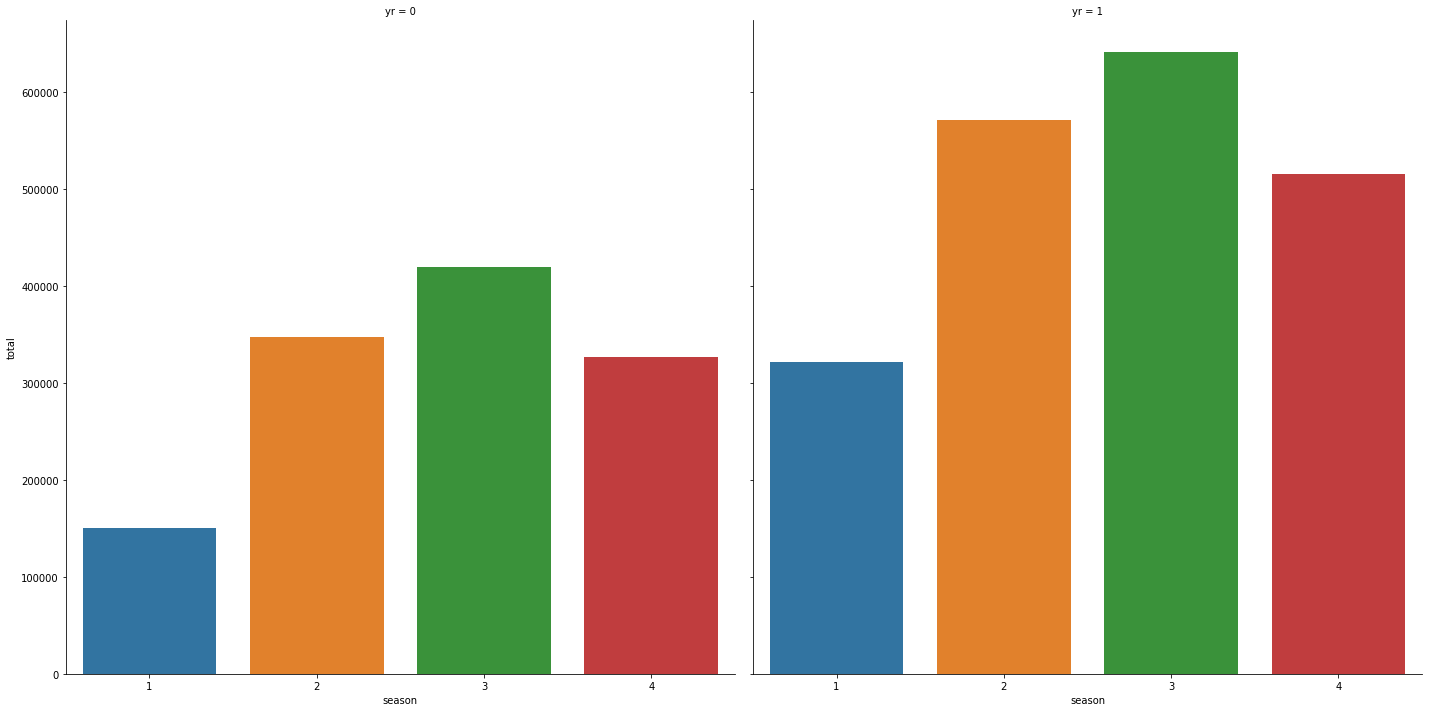

In [58]:
#Total count per year
g=sns.factorplot(x='season',y='total',data=df,
                 col='yr',kind='bar',estimator=sum,
                 ci=None,size=10,aspect=1)

# Linear regression model

In [60]:
#x variables

xwinter = winter.drop(['season', 'total', 'registered','casual', 'yr', 'compare'], axis=1)
xspring = spring.drop(['season', 'total', 'registered','casual','yr','compare'], axis=1)
xsummer = summer.drop(['season', 'total', 'registered','casual','yr', 'compare'], axis=1)
xautumn = autumn.drop(['season', 'total', 'registered','casual','yr', 'compare'], axis=1)


In [61]:
#y variables

ywinter = winter.total 
yspring = spring.total
ysummer = summer.total
yautumn = autumn.total

In [96]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
# Import linear_model from sklearn
from sklearn import linear_model

linreg = LinearRegression()

In [119]:
linreg.fit(xwinter, ywinter)

# Assign the coefficients to a list coef
coef = linreg.coef_

#This for loop must workk, but it does not. 
#for p,c in zip(predictors,list(coef[0])):
 #   print(p + '\t' + str(c))
    
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

1539.1739230890653
[  347.76892963  -379.64541866  9337.42340925 -1261.70757948
 -3148.58731849]


In [120]:
xwinter.columns

Index(['workingday', 'weathersit', 'temp', 'hum', 'windspeed'], dtype='object')

### Meaning of the coefficients
During winter, if we holding all other features fixed, one unit increase in ... 

- ... workingday is associated with a rental increase of 348 bikes.
- ... weathersit, decrease of -380 bikes.
- ... temp, increase of 9337 bikes.
- ... hum, decrease of -1262 bikes.
- ... windspeed, decrease of -3148 bikes. 

These are not statements of causation.


### Using the model for prediction

How many bike rentals would we predict if the temperature was 10 degrees Celsius?

In [121]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*10

array([  5016.8632194 ,  -2257.28026351,  94913.40801555, -11077.90187167,
       -29946.69926185])

In [123]:
# use the predict method, does not work. 
#linreg.predict(10)

 ## Train/test split
 
 This is a more reliable approach than using p-values or R-squared for feature selection.

In [69]:
from sklearn.model_selection import train_test_split

In [124]:
xwinter.columns

Index(['workingday', 'weathersit', 'temp', 'hum', 'windspeed'], dtype='object')

In [112]:
X = xautumn
y = yautumn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)

intercept 6607.6627
[  116.3146378   -232.11328263  9059.51797675 -7171.45022437
 -4539.76382043]


## Evaluation metrics

To evaluate the performance of our models, the methods from discrete values such as accuracy, proper from classification problems, are not useful. For regression problems we need  metrics designed for comparing continuous values, such as the mean squared error (MSE), in its absolute form (AMSE) and root squared form (RMSE).

MSE punishes outliers or large errors, while RMSE is interpretable in the y units.

In [126]:
# create a list of features
feature = ['workingday', 'weathersit', 'temp', 'hum', 'windspeed']

In [128]:
#MORE ELEGANT 
# define a function that accepts a list of features and returns testing RMSE

from sklearn import metrics
import numpy as np


def train_test_rmse(feature):
    X = xwinter[feature]
    y = ywinter
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [129]:
# compare different sets of features
print(train_test_rmse(['workingday', 'weathersit']))
print(train_test_rmse(['workingday', 'weathersit', 'temp', 'hum', 'windspeed']))
print(train_test_rmse(['workingday', 'temp', 'hum', 'windspeed']))

1748.4188066997863
1211.590655495191
1164.3751605644572


In [105]:
#Another method

import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)

In [113]:
print(' R^2: %.4f' % linreg.score(X_test, y_test))
print('RMSE: %.4f' % lin_rmse)

 R^2: 0.3956
RMSE: 1211.5907


## RESULTS
Features: 'workingday', 'weathersit', 'temp', 'hum', 'windspeed'

#### winter: 
- intercept 2099.2952
- [  489.05636892  -546.10483289  7592.39307206  -914.47650393
 -3818.9459931 ]
- R^2: 0.4264
- RMSE: 1211.5907


#### spring:
-intercept 4914.9038
- [ -222.66455563   -74.04381832  7244.61239867 -4153.92722223
 -5107.24420358]
- R^2: 0.3515
- RMSE: 1211.5907

#### summer:
- intercept 13065.9671
-[  -43.8698902   -496.31984411 -4754.86987475 -4232.65724152
 -4608.23920142]
- R^2: -0.0628
- RMSE: 1211.5907

#### autumn:
- intercept 6607.6627
- [  116.3146378   -232.11328263  9059.51797675 -7171.45022437
 -4539.76382043]
-   R^2: 0.3956
- RMSE: 1211.5907

### RMSE vs. null RMSE

Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [131]:
 # create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())

# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1790.420675583131

### Another method: comparing seasons using dummy variables

In [139]:
#ANOTHER METHOD 
    # create dummy variables
season_dummies = pd.get_dummies(df.season, prefix='season')

# print 5 random rows
#season_dummies.sample(n=5, random_state=1)

# concatenate the original DataFrame and the dummy DataFrame 
#(axis=0 means rows, axis=1 means columns)

bikes = pd.concat([df, season_dummies], axis=1)

# print 5 random rows
#bikes.sample(n=5, random_state=1)

# include dummy variables for season in the model
feature_cols = ['workingday', 'weathersit', 'temp', 'hum', 'windspeed','season_2', 'season_3', 'season_4']

X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
print(feature_cols, linreg.coef_)

['workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4'] [  155.2355159   -464.91540272  6177.76494018 -2561.98802086
 -3662.98774215   928.67707767   433.44920567  1444.18574288]


In [140]:
# compare original season variable with dummy variables
print(train_test_rmse(['workingday', 'weathersit']))
print(train_test_rmse(['workingday', 'weathersit', 'temp', 'hum', 'windspeed','season_2', 'season_3', 'season_4']))

1748.4188066997863


KeyError: "['season_2' 'season_3' 'season_4'] not in index"

In [ ]:
#HOUR, taken from Georgios Karakostas

# hour as a numeric feature
bikes['hour'] = bikes.index.hour
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)


print(train_test_rmse(['hour']))
print(train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(['daytime']))

In [ ]:
#extracting info 

dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })


One way which I generally prefer to visualize missing value in the dataset is through "missingno".

In [ ]:
#Searching outliers. I realized this method is not the best. 

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 8)

sns.boxplot(data=df, y="total", x="season", orient="v", ax=axes[0][0])
sns.boxplot(data=data, y="total", x="season", orient="v", ax=axes[0][1])



axes[0][0].set(ylabel='Count',title="Count Across Season total")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Count Across Season 2012")

In [ ]:
sns.set_style('dark')
sns.set(color_codes= True)
sns.distplot(season1['hum'], color='g')

plt.show()

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="z", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Histogram of IQ')

# Set x-axis label
plt.xlabel('Time')

# Set y-axis label
plt.ylabel('Deaths')

In [ ]:
#ALL SORTS OF MODELS FOR LATER

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer, minmax_scale, QuantileTransformer, RobustScaler, PolynomialFeatures
#from sklearn.model_selection import KFold, cross_val_score

#from xgboost import XGBRegressor

In [132]:
#ROC AUC score

import numpy as np
from sklearn.metrics import roc_auc_score
#roc_auc_score(true_target, prob_target)

#ywinfit = linreg.predict(xwinter)